In [3]:
import pandas as pd

In [6]:
cd ..

c:\Users\carlo\Ironhack\Final Project


In [7]:
df = pd.read_csv ('./dataset/10y_2y.csv', encoding='unicode_escape')

In [8]:
df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
df['time'] = pd.to_datetime(df["time"])
df.set_index('time', inplace=True)

In [9]:
df_reindexed = df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))

In [10]:
df_reindexed

,close
1976-06-01,0.68
1976-06-02,0.71
1976-06-03,0.70
1976-06-04,0.77
1976-06-05,NaN
...,...
2022-11-14,-0.52
2022-11-15,-0.57
2022-11-16,-0.68
2022-11-17,-0.66


In [11]:
df_reindexed.interpolate(method='pad', inplace=True)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

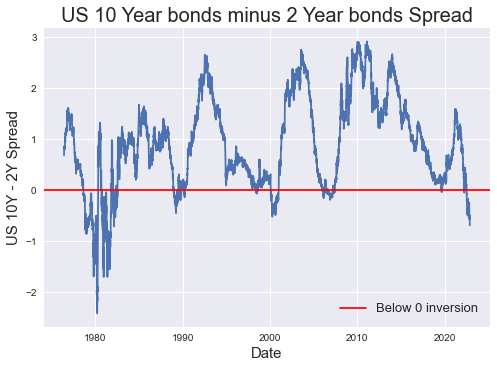

In [15]:
plt.plot(df_reindexed, color= 'b')
plt.title('US 10 Year bonds minus 2 Year bonds Spread', fontsize= 20)
plt.axhline(y=0, color= 'red', label= 'Below 0 inversion')
plt.legend(fontsize = 13, loc = 'lower right')
plt.xlabel('Date', fontsize= 15)
plt.ylabel('US 10Y - 2Y Spread', fontsize= 15)
plt.style.use('seaborn')